<a href="https://colab.research.google.com/github/PatelAkashMafatlal/Aerofit/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerofit Case Study

About Aerofit:

Aerofit is a leading brand in thje field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# Business Problem:

The market research team at Aerofit wants to identify the characteristics of the target audidence for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive Analysis to create a customer profile for each Aerofit treadmill product by developing appropriate tables and charts.

2. For each Aerofit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights on the business.

# Importing Libraries

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving aerofit_treadmill.csv to aerofit_treadmill.csv


# Importing the Dataset

In [ ]:
df = pd.read_csv("aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


# Basic Analysis

# Shape of the Data

In [ ]:
df.shape
# Number of rows = 180
# Number of columns = 9

(180, 9)

# Columns in a DataFrame

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

# First 5 rows

In [ ]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Data types of all the attributes (Columns)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Statistical summary of Numeric columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


# Statistical summary of Object columns

In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


# Non Graphical Analysis: Value counts and Unique Attributes

# Product Column

Unique

In [ ]:
df["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Analysis: Aerofit Produces three Treadmill models: KP281, KP481 & KP781

Value_counts

In [ ]:
Product_count = df["Product"].value_counts(normalize=True)*100
Product_count

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

Insights : Among the users, 44.44% prefer using the KP281 Treadmil, while 33% opt for the KP481 and 22% of users favor the KP781 Treadmil.

# Age Column

Unique

In [ ]:
df["Age"].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
df["Age"].nunique()

32

Value_counts

In [ ]:
Age_count = df["Age"].value_counts(normalize=True)*100


In [ ]:
Age_count[(Age_count.index>=20) & (Age_count.index<=30)].sum().round(2)

63.89

Insight: Approximately 64% of Aerofit Treadmil users belong to the age group of 20-30.

# Gender Column

Unique

In [ ]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df["Gender"].nunique()

2

Value_counts

In [ ]:
gender_count = df["Gender"].value_counts(normalize=True)*100
gender_count.round(2)

Male      57.78
Female    42.22
Name: Gender, dtype: float64

Insight : Aerofit has 57.78% Male customers and 42.22% Female customers

# Marital Status Column

Unique

In [ ]:
df["MaritalStatus"].unique()

array(['Single', 'Partnered'], dtype=object)

In [ ]:
df["MaritalStatus"].nunique()

2

In [ ]:
df["MaritalStatus"].value_counts(normalize=True)*100

Partnered    59.444444
Single       40.555556
Name: MaritalStatus, dtype: float64

Insight : 59.44% of Customers are married, while the remaining 40.55% are single.

# Data Preprocessing

# Missing Values and Outliers Detection

Handling Missing Values

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Inference

There are no missing values in a given dataset.

# Handling outliers

Income Column

In [ ]:
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

To find outliers, there are few below points which we need to find.

1. q3 = upper quartile
2. q1 = lower quartile
3. Median
4. upper bound
5. lower bound

In [ ]:
q1 = np.percentile(df["Income"],25)
q1

44058.75

In [ ]:
q3 = np.percentile(df["Income"],75)
q3

58668.0

To find lower bound and upper bound we need to find IQR (Inter Quartile Range)

In [ ]:
IQR = q3-q1
IQR

14609.25

# Analysis

KOI = 14609.25

In [ ]:
upper_bound = q3+1.5*IQR
upper_bound

80581.875

In [ ]:
lower_bound = q1-1.5*IQR
lower_bound

22144.875

In [ ]:
print("upper bound = ",upper_bound)
print("lower bound = ",lower_bound)
print("median = ",df["Income"].median())

upper bound =  80581.875
lower bound =  22144.875
median =  50596.5


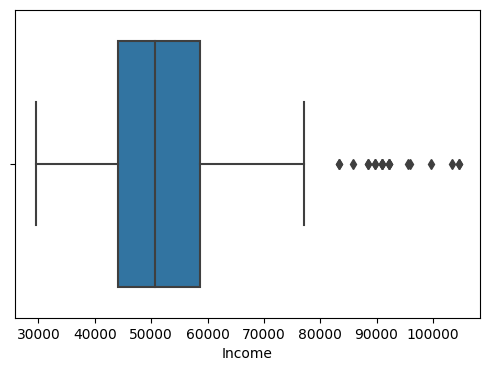

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Income")
plt.show()


*   As we see there are outliers in the "Income" column.
*   All values above upper bound are the ouliers in "Income" column.










# Outlier size

In [ ]:
len(df.loc[df["Income"]>upper_bound])/len(df)*100

10.555555555555555

# Analysis

10.5% values in income column are outliers.

# Handling Outliers

Miles column

In [ ]:
df["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [ ]:
q1_1 = np.percentile(df["Miles"],25)
q1_1

66.0

In [ ]:
q3_1 = np.percentile(df["Miles"],75)
q3_1

114.75

In [ ]:
# To find outliers in the miles column, we require IQR (Inter Quartile Range)
IQR_1 = q3_1-q1_1
IQR_1

48.75

In [ ]:
lower_bound = q1_1-1.5*IQR_1
lower_bound

-7.125

In [ ]:
upper_bound = q3_1+1.5*IQR_1
upper_bound

187.875

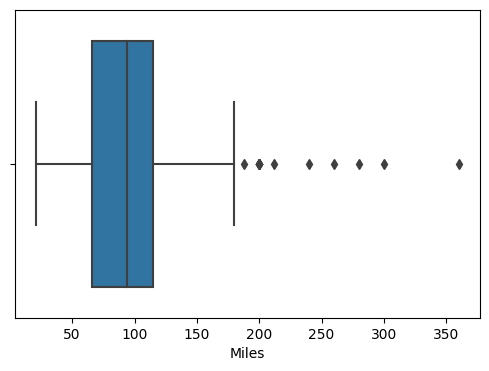

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x="Miles")
plt.show()

# Percentage of outliers in the Miles column.

In [ ]:
len(df.loc[df["Miles"]>upper_bound])/len(df)*100

7.222222222222221

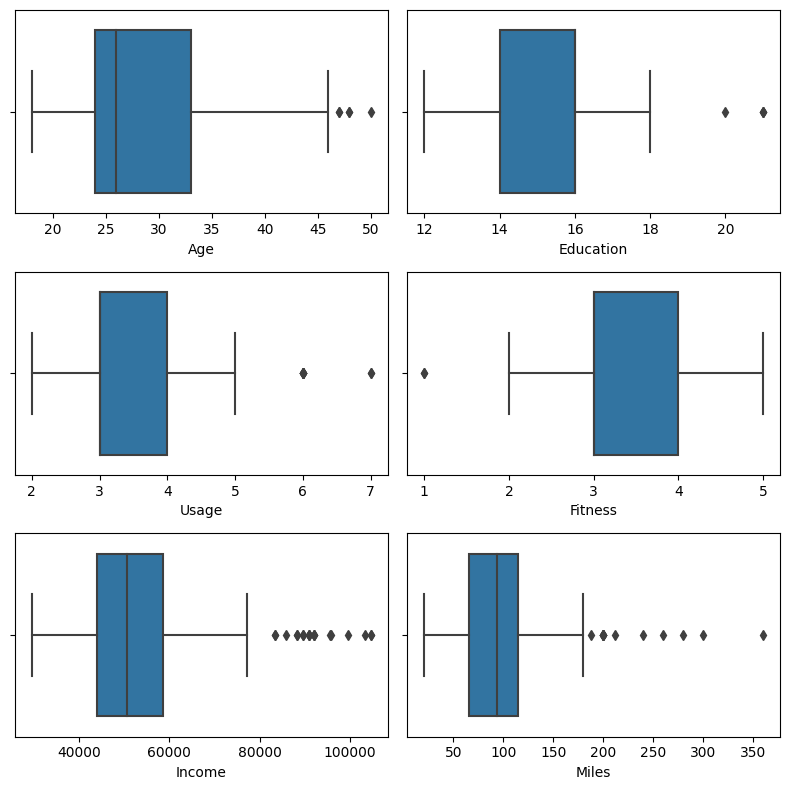

In [ ]:
num_cols = df.describe(exclude="object")
col_names = num_cols.columns
fig = plt.figure(figsize=(8,8))
for i in range(6):
  fig.tight_layout()
  grid_cols = "32{}".format(i+1)
  ax = fig.add_subplot(int(grid_cols))
  sns.boxplot(data=df, x=col_names[i], ax=ax)
plt.show()

# Addig new columns - Income group and Age group

Age group

In [ ]:
# To gain valuable insights, it is essential to categorize the age column into distinct groups, such as young,
# middle aged, and old. It will allows us to understand the customer purchase behavior.

In [ ]:
df["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
df["Age group"]=pd.cut(df["Age"],bins=[17,29,39,50], labels=["Young","Middle-aged","Old"])

# Age groups:

17-29 : Young

30-39 : Middle-aged

40-50 : Old



In [ ]:
df["Age group"].value_counts()

Young          113
Middle-aged     50
Old             17
Name: Age group, dtype: int64

Income group

In [ ]:
df["Income"].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [ ]:
df["Income group"]=pd.cut(df["Income"],bins=[29000,50000,75000,105000],labels=["Low","Medium","High"])

# Income groups

1. 29000-50000 : low
2. 51000-75000 : Medium
3. 76000-105000 : High

In [ ]:
df["Income group"].isnull().sum()

0

In [ ]:
df["Income group"].value_counts()

Low       83
Medium    76
High      21
Name: Income group, dtype: int64

# Univariate Analysis

# Categorical Columns

# Distribution of Treadmills among Aerofit customers

Text(0, 0.5, 'Number of users')

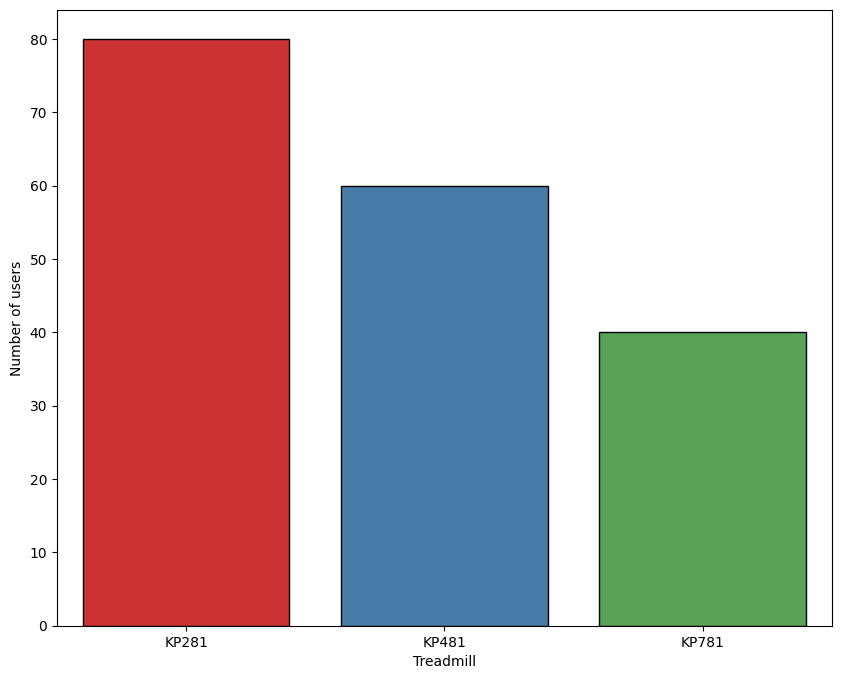

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x=df["Product"], palette="Set1",edgecolor="black")
plt.xlabel("Treadmill")
plt.ylabel("Number of users")

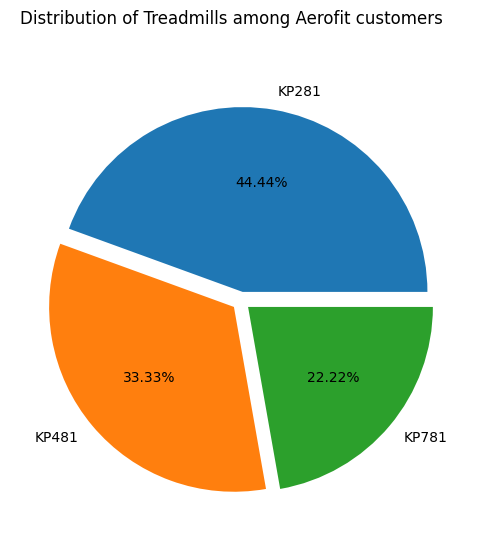

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(df["Product"].value_counts().values, labels=df["Product"].unique(), explode=[0.05,0.05,0.05], autopct='%1.2f%%')
plt.suptitle("Distribution of Treadmills among Aerofit customers")
plt.show()

Insights

1. Among the users, 44.44% prefer using KP281 treadmil, while 33.33% opt for the KP481 treadmil and only 22.22% users favor the KP781 Treadmil.
2. KP281 is being an cheap treadmil compared to others, is the preferred
choice among the majority of the customers.

# Distribution of gender among Aerofit Customers

Text(0, 0.5, 'Number of users')

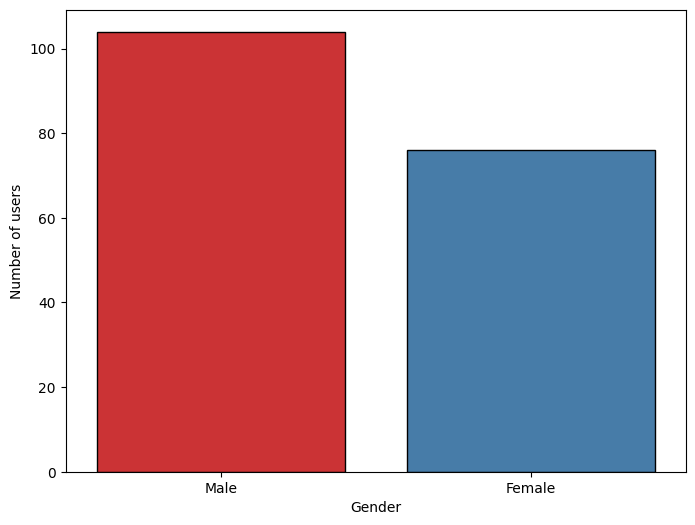

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x=df["Gender"],palette="Set1",edgecolor="black")
plt.xlabel("Gender")
plt.ylabel("Number of users")

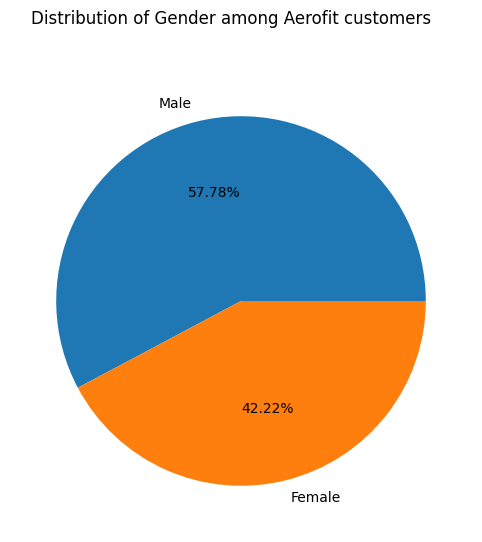

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(df["Gender"].value_counts().values, labels=df["Gender"].unique(), autopct='%1.2f%%')
plt.suptitle("Distribution of Gender among Aerofit customers")
plt.show()

# Insight:
Aerofit has 57.78% Male customers and 42.22% Female customers.

# Distribution of MaritalStatus among Aerofit Customers

Text(0, 0.5, 'Number of users')

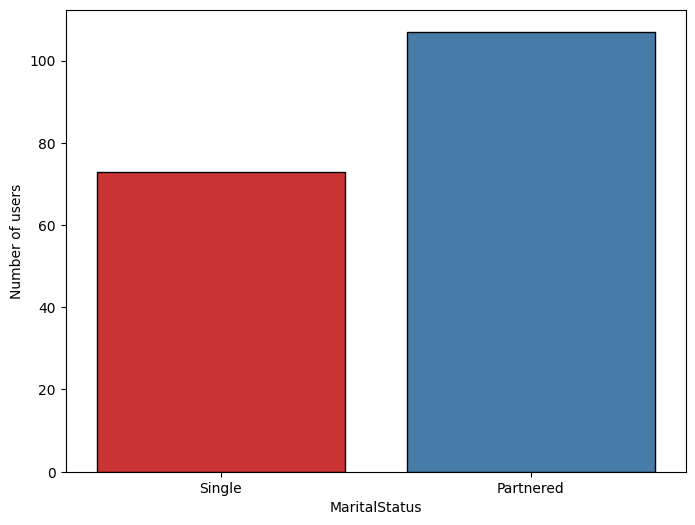

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x=df["MaritalStatus"],palette="Set1",edgecolor="black")
plt.xlabel("MaritalStatus")
plt.ylabel("Number of users")


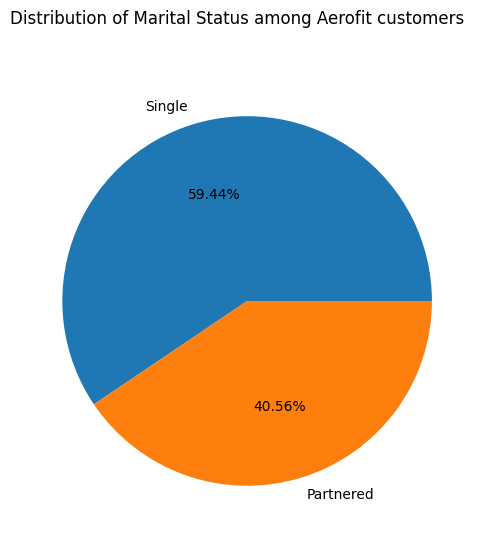

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(df["MaritalStatus"].value_counts().values, labels=df["MaritalStatus"].unique(), autopct='%1.2f%%')
plt.suptitle("Distribution of Marital Status among Aerofit customers")
plt.show()

# Insight:
59.44% of Aerofit customers are married while remaining 40.56% are single.

# Distribution of Age Group

Text(0, 0.5, 'Number of users')

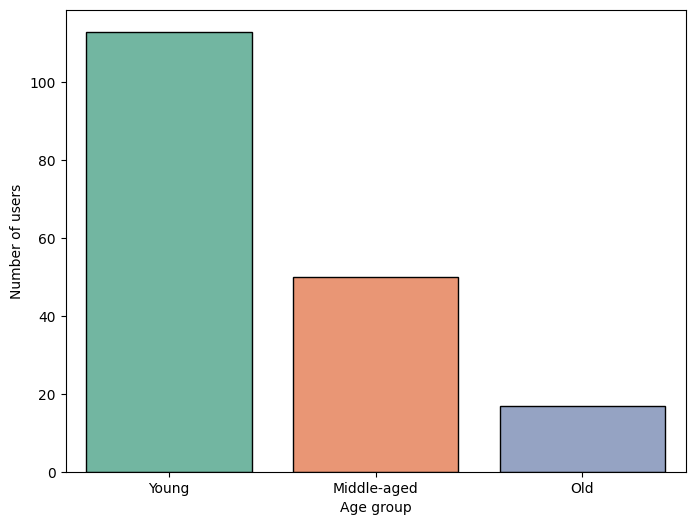

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x=df["Age group"], palette="Set2",edgecolor="black")
plt.xlabel("Age group")
plt.ylabel("Number of users")

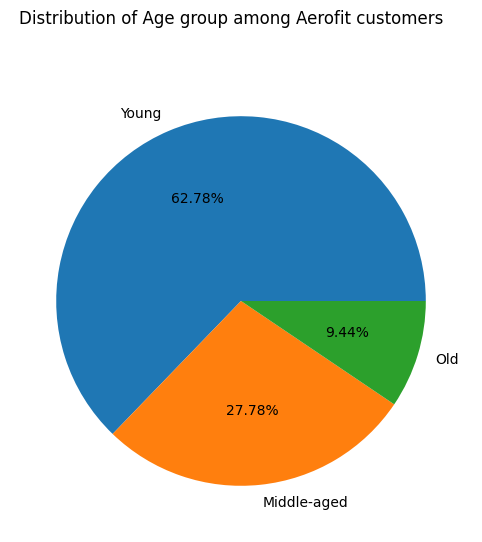

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(df["Age group"].value_counts().values, labels=df["Age group"].unique(), autopct='%1.2f%%')
plt.suptitle("Distribution of Age group among Aerofit customers")
plt.show()

# Insight:
1. Most of the Aerofit customers falls under the young age-group (18-29).
2. 27.78% of middle-aged users prefer to use the Aerofit Treadmils.


# Distribution of Income group

Text(0, 0.5, 'Number of users')

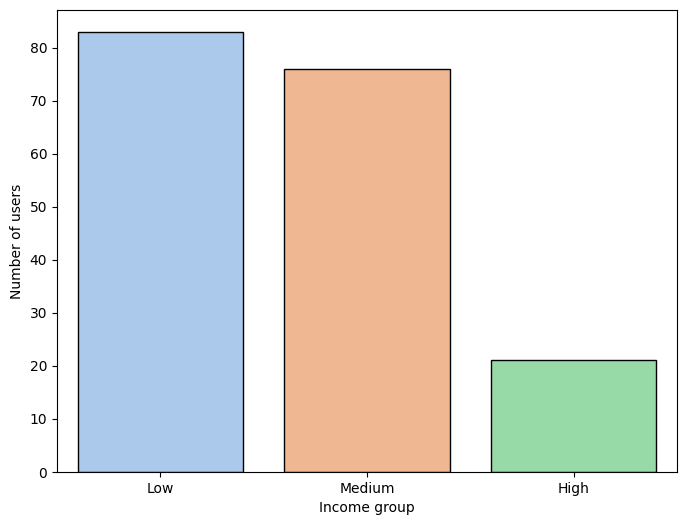

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x=df["Income group"], palette="pastel",edgecolor="black")
plt.xlabel("Income group")
plt.ylabel("Number of users")

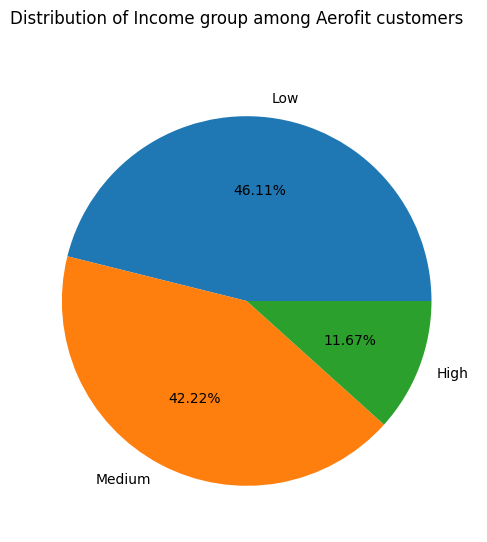

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(df["Income group"].value_counts().values, labels=df["Income group"].unique(), autopct='%1.2f%%')
plt.suptitle("Distribution of Income group among Aerofit customers")
plt.show()

# Numeric Columns

# Distribution of Age

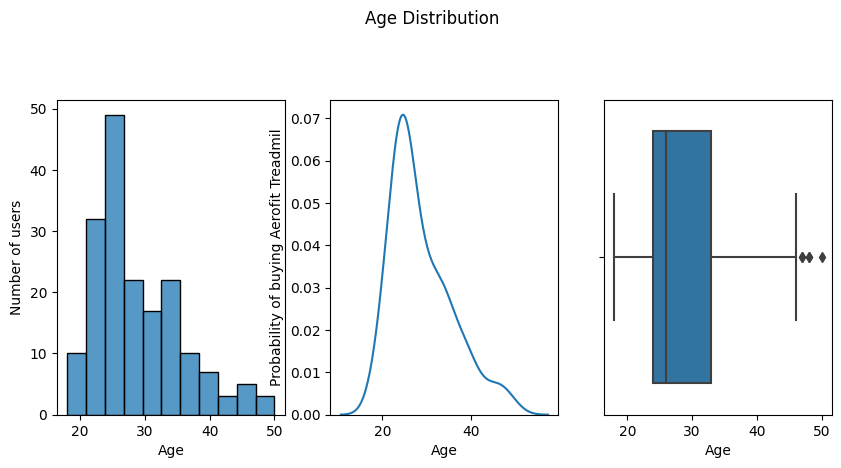

In [ ]:
plt.figure(figsize=(10,9))
# Histogram
plt.subplot(2,3,1)
sns.histplot(data=df,x="Age")
plt.xlabel("Age")
plt.ylabel("Number of users")
#kdeplot
plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Age")
plt.xlabel("Age")
plt.ylabel("Probability of buying Aerofit Treadmil")
#boxplot
plt.subplot(2,3,3)
sns.boxplot(data=df,x="Age")
plt.suptitle("Age Distribution")
plt.show()


# Insight:
1. The majority of Aerofit customers belong to the age group of 18-30 and there is high probability of them purchasing Aerofit Treadmils.
2. There are very few users in the age group of 40-50 and the probability of them buying Aerofit Treadmils is significantly low.

# Distribution of Income

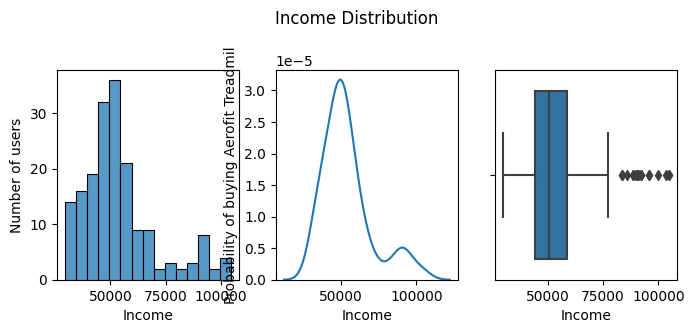

In [ ]:
plt.figure(figsize=(8,6))
# Histogram
plt.subplot(2,3,1)
sns.histplot(data=df,x="Income")
plt.xlabel("Income")
plt.ylabel("Number of users")
#kdeplot
plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Income")
plt.xlabel("Income")
plt.ylabel("Probability of buying Aerofit Treadmil")
#boxplot
plt.subplot(2,3,3)
sns.boxplot(data=df,x="Income")
plt.suptitle("Income Distribution")
plt.show()


# Insight:
1. Surprisingly, customers having income greater than 70000 have a significantly lower likelihood of buying aerofit treadmils.

# Distribution of Education level

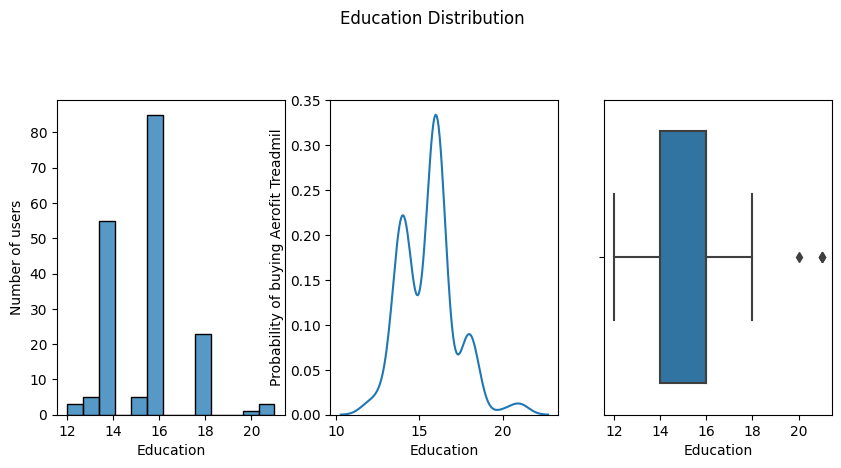

In [ ]:
plt.figure(figsize=(10,9))
# Histogram
plt.subplot(2,3,1)
sns.histplot(data=df,x="Education")
plt.xlabel("Education")
plt.ylabel("Number of users")
#kdeplot
plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Education")
plt.xlabel("Education")
plt.ylabel("Probability of buying Aerofit Treadmil")
#boxplot
plt.subplot(2,3,3)
sns.boxplot(data=df,x="Education")
plt.suptitle("Education Distribution")
plt.show()

# Distribution of Fitness Level

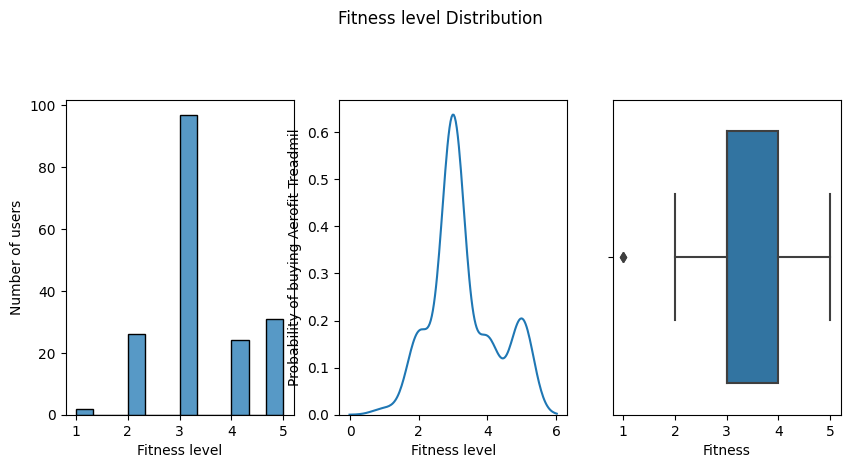

In [ ]:
plt.figure(figsize=(10,9))
# Histogram
plt.subplot(2,3,1)
sns.histplot(data=df,x="Fitness")
plt.xlabel("Fitness level")
plt.ylabel("Number of users")
#kdeplot
plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Fitness")
plt.xlabel("Fitness level")
plt.ylabel("Probability of buying Aerofit Treadmil")
#boxplot
plt.subplot(2,3,3)
sns.boxplot(data=df,x="Fitness")
plt.suptitle("Fitness level Distribution")
plt.show()

# Insight:
The majority of Aerofit customers possess Fitness level 3, which aligns with a likelihood of them purchasing treadmils.

# Distribution of Usage:

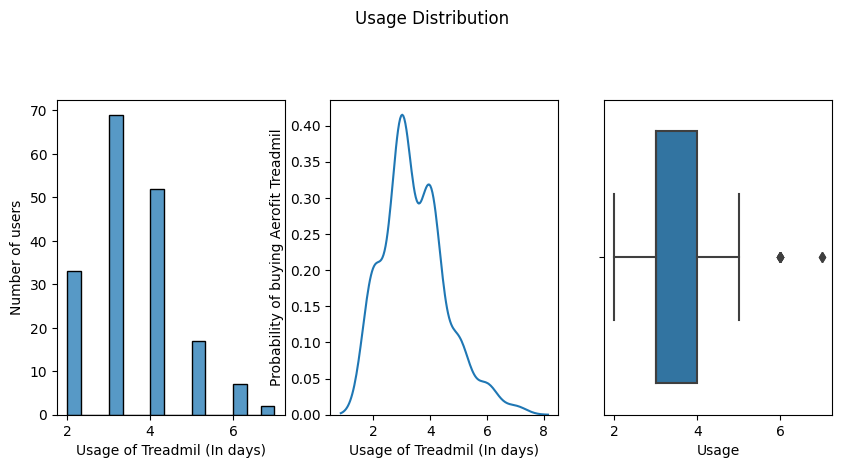

In [ ]:
plt.figure(figsize=(10,9))
# Histogram
plt.subplot(2,3,1)
sns.histplot(data=df,x="Usage")
plt.xlabel("Usage of Treadmil (In days)")
plt.ylabel("Number of users")
#kdeplot
plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Usage")
plt.xlabel("Usage of Treadmil (In days)")
plt.ylabel("Probability of buying Aerofit Treadmil")
#boxplot
plt.subplot(2,3,3)
sns.boxplot(data=df,x="Usage")
plt.suptitle("Usage Distribution")
plt.show()

# Insights
1. The majority of customers uses treadmil thrice a week.

# Descriptive Statistics of Numeric columns

# Age Column

In [ ]:
mean = df["Age"].mean().round(2)
standard_deviation = df["Age"].std().round(2)
median = df["Age"].median().round(2)
minimum = df["Age"].min()
maximum = df["Age"].max()
q1 = np.percentile(df["Age"],25)
q3 = np.percentile(df["Age"],75)
IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
print("...Desciptive statistics of Age column...")
print("mean :",mean)
print("standard_deviation :",standard_deviation)
print("median :",median)
print("minimum :",minimum)
print("maximum :",maximum)
print("q1 :",q1)
print("q3 :",q3)
print("IQR :",IQR)
print("lower_bound :",lower_bound)
print("upper_bound :",upper_bound)

...Desciptive statistics of Age column...
mean : 28.79
standard_deviation : 6.94
median : 26.0
minimum : 18
maximum : 50
q1 : 24.0
q3 : 33.0
IQR : 9.0
lower_bound : 10.5
upper_bound : 46.5


# Usage column

In [ ]:
mean = df["Usage"].mean().round(2)
standard_deviation = df["Usage"].std().round(2)
median = df["Usage"].median().round(2)
minimum = df["Usage"].min()
maximum = df["Usage"].max()
q1 = np.percentile(df["Usage"],25)
q3 = np.percentile(df["Usage"],75)
IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
print("...Desciptive statistics of Usage column...")
print("mean :",mean)
print("standard_deviation :",standard_deviation)
print("median :",median)
print("minimum :",minimum)
print("maximum :",maximum)
print("q1 :",q1)
print("q3 :",q3)
print("IQR :",IQR)
print("lower_bound :",lower_bound)
print("upper_bound :",upper_bound)

...Desciptive statistics of Usage column...
mean : 3.46
standard_deviation : 1.08
median : 3.0
minimum : 2
maximum : 7
q1 : 3.0
q3 : 4.0
IQR : 1.0
lower_bound : 1.5
upper_bound : 5.5


# Fitness Column

In [ ]:
mean = df["Fitness"].mean().round(2)
standard_deviation = df["Fitness"].std().round(2)
median = df["Fitness"].median().round(2)
minimum = df["Fitness"].min()
maximum = df["Fitness"].max()
q1 = np.percentile(df["Fitness"],25)
q3 = np.percentile(df["Fitness"],75)
IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
print("...Desciptive statistics of Fitness column...")
print("mean :",mean)
print("standard_deviation :",standard_deviation)
print("median :",median)
print("minimum :",minimum)
print("maximum :",maximum)
print("q1 :",q1)
print("q3 :",q3)
print("IQR :",IQR)
print("lower_bound :",lower_bound)
print("upper_bound :",upper_bound)

...Desciptive statistics of Fitness column...
mean : 3.31
standard_deviation : 0.96
median : 3.0
minimum : 1
maximum : 5
q1 : 3.0
q3 : 4.0
IQR : 1.0
lower_bound : 1.5
upper_bound : 5.5


# Income column

In [ ]:
mean = df["Income"].mean().round(2)
standard_deviation = df["Income"].std().round(2)
median = df["Income"].median().round(2)
minimum = df["Income"].min()
maximum = df["Income"].max()
q1 = np.percentile(df["Income"],25)
q3 = np.percentile(df["Income"],75)
IQR = q3-q1
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
print("...Desciptive statistics of Income column...")
print("mean :",mean)
print("standard_deviation :",standard_deviation)
print("median :",median)
print("minimum :",minimum)
print("maximum :",maximum)
print("q1 :",q1)
print("q3 :",q3)
print("IQR :",IQR)
print("lower_bound :",lower_bound)
print("upper_bound :",upper_bound)

...Desciptive statistics of Income column...
mean : 53719.58
standard_deviation : 16506.68
median : 50596.5
minimum : 29562
maximum : 104581
q1 : 44058.75
q3 : 58668.0
IQR : 14609.25
lower_bound : 22144.875
upper_bound : 80581.875


# Bivariate Analysis

# Distribution of Gender across each Treadmil

In [ ]:
gender_df = df.groupby(['Product','Gender']).size().unstack()
gender_df

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


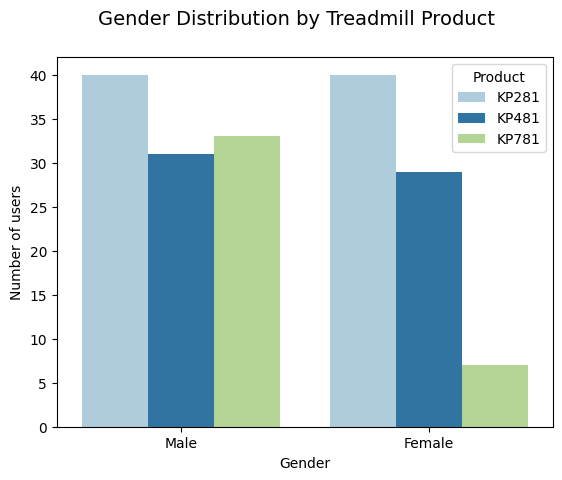

In [ ]:
sns.countplot(data=df, x="Gender", hue="Product", palette="Paired")
plt.suptitle("Gender Distribution by Treadmill Product", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Number of users")
plt.show()

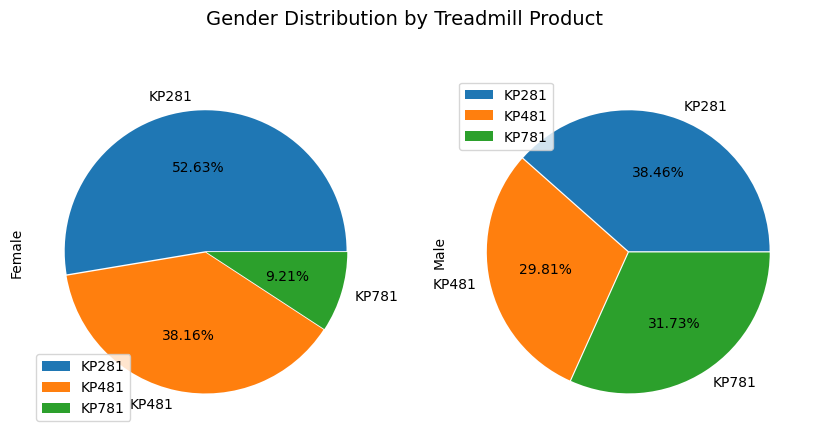

In [ ]:
gender_df.plot(kind="pie",subplots=True,figsize=(10,5),explode=(0.005,0.005,0.005),autopct='%1.2f%%')
plt.suptitle('Gender Distribution by Treadmill Product', fontsize=14)
plt.show()

# Distribution of Marital status among customers who purchased each Treadmill

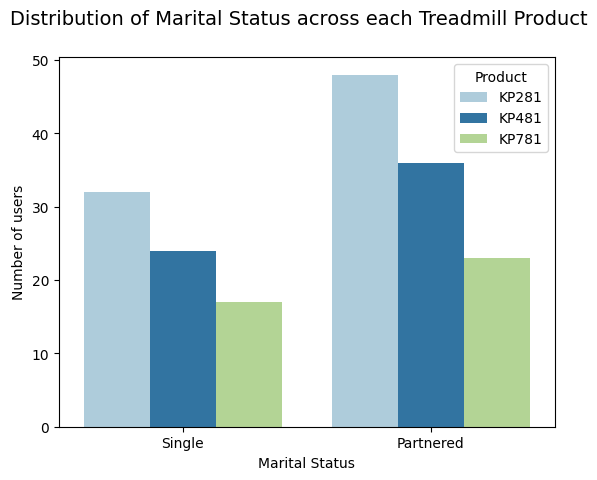

In [ ]:
sns.countplot(data=df, x="MaritalStatus", hue="Product", palette="Paired")
plt.suptitle("Distribution of Marital Status across each Treadmill Product", fontsize=14)
plt.xlabel("Marital Status")
plt.ylabel("Number of users")
plt.show()

In [ ]:
Maritalstatus_df = df.groupby(['Product','MaritalStatus']).size().unstack()
Maritalstatus_df

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


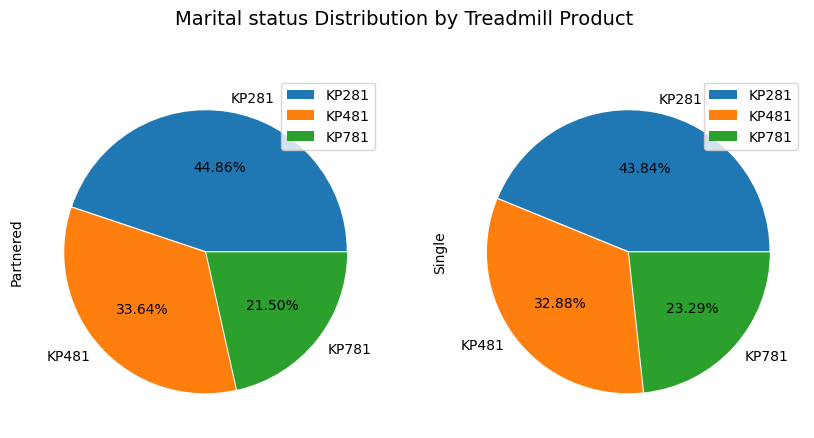

In [ ]:
Maritalstatus_df.plot(kind="pie",subplots=True,figsize=(10,5),explode=(0.005,0.005,0.005),autopct='%1.2f%%')
plt.suptitle('Marital status Distribution by Treadmill Product', fontsize=14)
plt.show()

# Distribution of Miles and Education For each Treadmill

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age group,Income group
0,KP281,18,Male,14,Single,3,4,29562,112,Young,Low
1,KP281,19,Male,15,Single,2,3,31836,75,Young,Low
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young,Low
3,KP281,19,Male,12,Single,3,3,32973,85,Young,Low
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young,Low


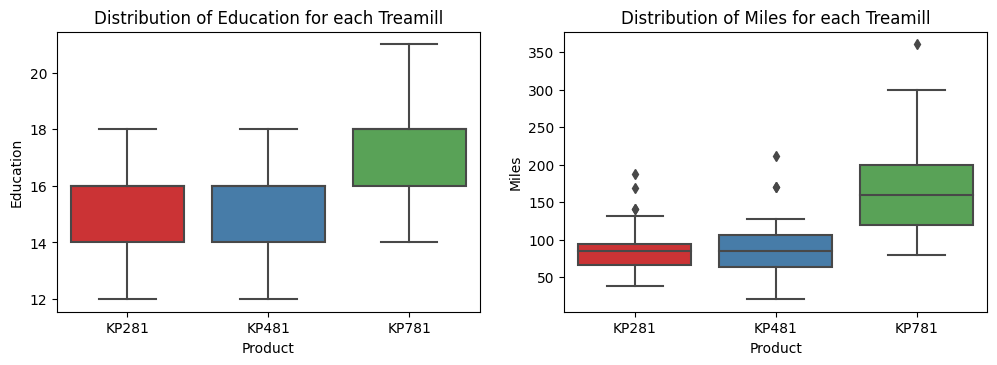

In [ ]:
columns = ["Education","Miles"]
plt.figure(figsize=(12,8))
for i,col in enumerate(columns,1):
  plt.subplot(2,2,i)
  sns.boxplot(data=df,x="Product",y=col,palette="Set1")
  plt.title(f'Distribution of {col} for each Treamill')
plt.show()

Insights:
1. customers with 14-16 years of education prefer the KP281 & KP481 Treadmills.However, among all treamills, the majority of customers with 16-8 years of education prefer the KP781 Treadmill.
2.customers who run 60-100 miles per week prefer the KP281 Treadmill, while who run 60-120 miles per week opt for the KP481. On the other hand, hardcore runners who run 120-200 miles per week prefer the KP781 Treadmill.

# Distribution of usage and Fitness across each Treadmill

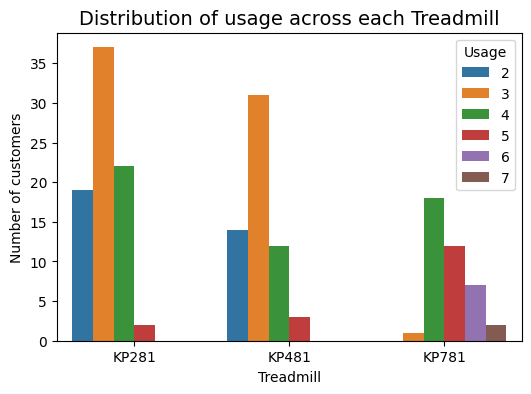

In [ ]:
# Usage Column
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Product", hue="Usage")
plt.title("Distribution of usage across each Treadmill", fontsize=14)
plt.xlabel("Treadmill")
plt.ylabel("Number of customers")
plt.show()


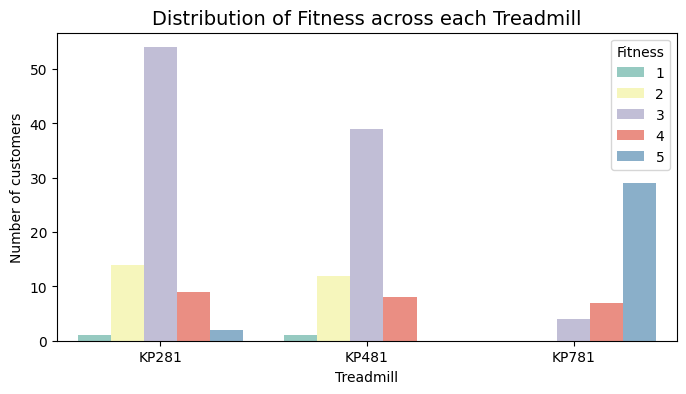

In [ ]:
# Fitness Column
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Product", hue="Fitness", palette='Set3')
plt.title("Distribution of Fitness across each Treadmill", fontsize=14)
plt.xlabel("Treadmill")
plt.ylabel("Number of customers")
plt.show()

# Insight:
1. customers who use treadmill 3 times a week prefer both KP281 & KP481.However, customers who use treadmill 4-5 times a week favor the KP781 Treadmill.
2.customers with Fitness level 3 prefer both KP281 and KP481 Treadmills, while customers with fitness level 3 choose KP781.

# Heatmap

<ipython-input-102-68d40e4627a9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="PiYG",fmt='.2f')


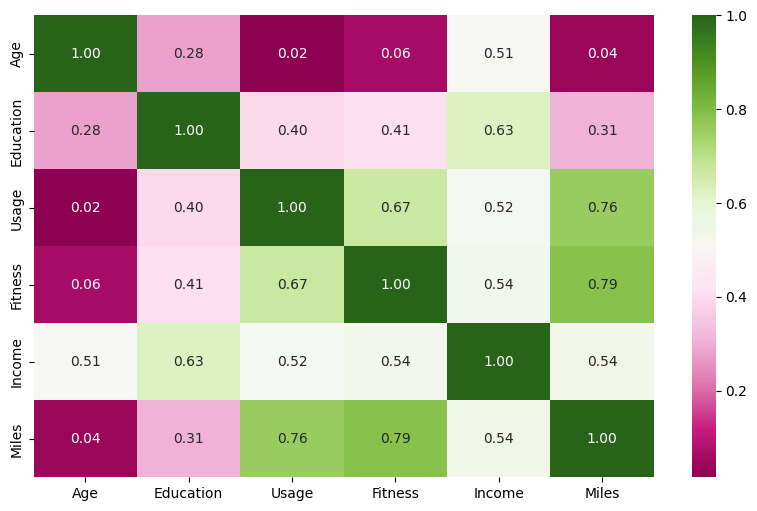

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="PiYG",fmt='.2f')
plt.show()

# Conditional and Marginal Probablities

# Impact of gender on purchasing Treadmill



In [ ]:
pd.crosstab(df.Product, df.Gender, margins=True, normalize="all")

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


Marginal Probablities

*   P(KP281) = 0.44
*   P(KP481) = 0.33
*   P(KP781) = 0.22
*   P(Female) = 0.42
*   P(Male) = 0.58

Conditional Probablities

*   P(KP281|Male)=0.22
*   P(KP281|Female)=0.22
*   P(KP481|Male)=0.17
*   P(KP481|Female)=0.16
*   P(KP781|Male)=0.18
*   P(KP781|Female)=0.04






# Impact of Age groups on purchasing Treadmill


In [ ]:
pd.crosstab(df["Product"], df["Age group"], margins=True, normalize="all")

Age group,Young,Middle-aged,Old,All
Product,,,,
KP281,0.294444,0.111111,0.038889,0.444444
KP481,0.183333,0.122222,0.027778,0.333333
KP781,0.150000,0.044444,0.027778,0.222222
All,0.627778,0.277778,0.094444,1.000000


Marignal Probablities

*   P(KP281) = 0.44
*   P(KP481) = 0.33
*   P(KP781) = 0.22
*   P(Young) = 0.63
*   P(Middle-aged) = 0.28
*   P(old) = 0.09



Conditional Probablities

*   P(KP281|Young) = 0.29
*   P(KP281|Middle-aged) = 0.11
*   P(KP281|Old) = 0.04
*   P(KP481|Young) = 0.18
*   P(KP481|Middle-aged) = 0.12
*   P(KP481|Old) = 0.02
*   P(KP781|Young) = 0.15
*   P(KP781|Middle-aged) = 0.04
*   P(KP781|Old) = 0.03




# Customer Profiling

Potential buyers for KP281 Treadmill
1. Gender - Male and Female
2. Marital Status - Both Partnered and Single
3. Age: 18-29 as probability of customers purchasing the KP281 is low.
4. Income: 29000-50000 USD as probability of customers belonging to high income group purchasing the KP281 treadmill is 0.
5. Education: 14-16 years
6. Fitness level:3
7. Usage: use treadmill 3 times a week
8. Miles: run 60-100 miles per week

Potential buyers for KP481 Treadmill
1. Gender - Male and Female
2. Marital Status - Both Partnered and Single
3. Age: 18-39 years
4. Income: 29000-75000 USD as probability of customers belonging to high income group purchasing the KP481 treadmill is 0.
5. Education: 14-16 years
6. Fitness level:3
7. Usage: use treadmill 3 times a week
8. Miles: runs 80-120 miles per week

Potential buyers for KP781 Treadmill
1. Gender - Mostly Male customers becuase probability of female customers buying KP781 treadmill is very low.
2. Marital Status - Only married customers
3. Age: 18-39 years.
4. Income: 75000-105000 USD as probability of customers belonging to high income group purchasing the KP781 treadmill is 0.
5. Education: 16-18 years
6. Fitness level:5
7. Usage: use treadmill 3 times a week
8. Miles: run 120-200 miles per week

# Insights:

1. Among the users, 44.45% prefer using the KP281 Treadmill, while 33.33% opt for the KP481 and rest of the users favor the KP781.
2. KP281 is the preferred choice among the majority of customers due to less price.
3. Aerofit has 57.78% male customers and 42.22% female customers.
4. Probability of female customers buying KP781 is 4% which is very low.
5. 59.4% Aerofit customers are married, while remaining 40.6% are single.
6. KP281 is being the most frequent purchased Treadmill while KP781 is being the least frequent purchased Treadmill.
7.Most of the Aerofit customer falls under young age group(18-29).
8.27.78% of middle-aged(30-39) age group prefer to use Aerofit Treadmills.
9.4% of users in the old(40-50) age group prefer purchasing Aerofit Treadmills.
10.Among young customers, the purchase distribution for Aerofit Treadmills is as follows: 46.9% prefer KP281, 29.2% prefer KP481 and remaining 23.9% prefer KP781.
11. The probability of middle aged customers buying the KP281 Treadmill is 11%, while the probability of buying KP481 Treadmill is 12% and same for the KP781 Treadmill is 4%.
12. Approximately, 88% of the Aerofit customers belong to the low-income and medium-income groups. Remaining 12% belong to high-income groups.
13.customers with 14-16 years of education prefer the KP281 & KP481 treadmills. However, the majority of customers with 16-18 years of education prefer KP781 Treamill.
14. customers who run 60-100 miles per week prefer KP281, who run 60-120 miles prefer KP481 and 120-200 miles per week opt for KP781.
15.customers who use treamills 3 times a week prefer both KP281 & KP481 and who use treadmills 5 times a week prefer KP781.


# Recommendations
1. Provide special offers or discounts to further entice customers looking for a cost-effective option.
2. showcase the competitibe pricing and outstanding features of the KP481 to make it a cost-effective choice for customers.
3. create targetted advertisements that appeal to women, showcasing how fitness can positively impact their lives.
4. offer special attention to help customes aged 40-50 select the ideal treadmill model providing them with the tools to maintain an active and healthy lifestyle.
5. Provide easy EMI options for the KP781 Treadmill.This will allow low and middle-income customers to spread the cost over several months, easing their financial problem and making the purchase more manageable.